<a href="https://colab.research.google.com/github/8066-asad/Structural-Foundation-Design-and-Analysis-using-ML/blob/main/Isolated_Footing_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fyp Isolated 1.xlsx to Fyp Isolated 1 (7).xlsx
Allowable Soil Bearing Pressure (Psf)    0
Compressive Strength of concete (psi)    0
Dead Load (kips)                         0
Live Load (Kips)                         0
Yield Stength of Steel (Psi)             0
Depth of footing Below Grade (ft)        0
Unit Weight of Soil (pcf)                0
Unit Weight of Concrete (lbs/ft^3)       0
Width of Column (ft)                     0
Prefferered Bar Number                   0
Footing Length (ft)                      0
Footing Width (ft)                       0
Number of Bars                           0
Area of Steel Provided (in^2)            0
Spacing (inches)                         0
dtype: int64
--- Footing Length (ft) ---
R² Score       : 98.92%
Mean Absolute Error (MAE): 0.07
Root Mean Squared Error (RMSE): 0.09

--- Footing Width (ft) ---
R² Score       : 98.92%
Mean Absolute Error (MAE): 0.07
Root Mean Squared Error (RMSE): 0.09

--- Number of Bars ---
R² Score       : 85.10

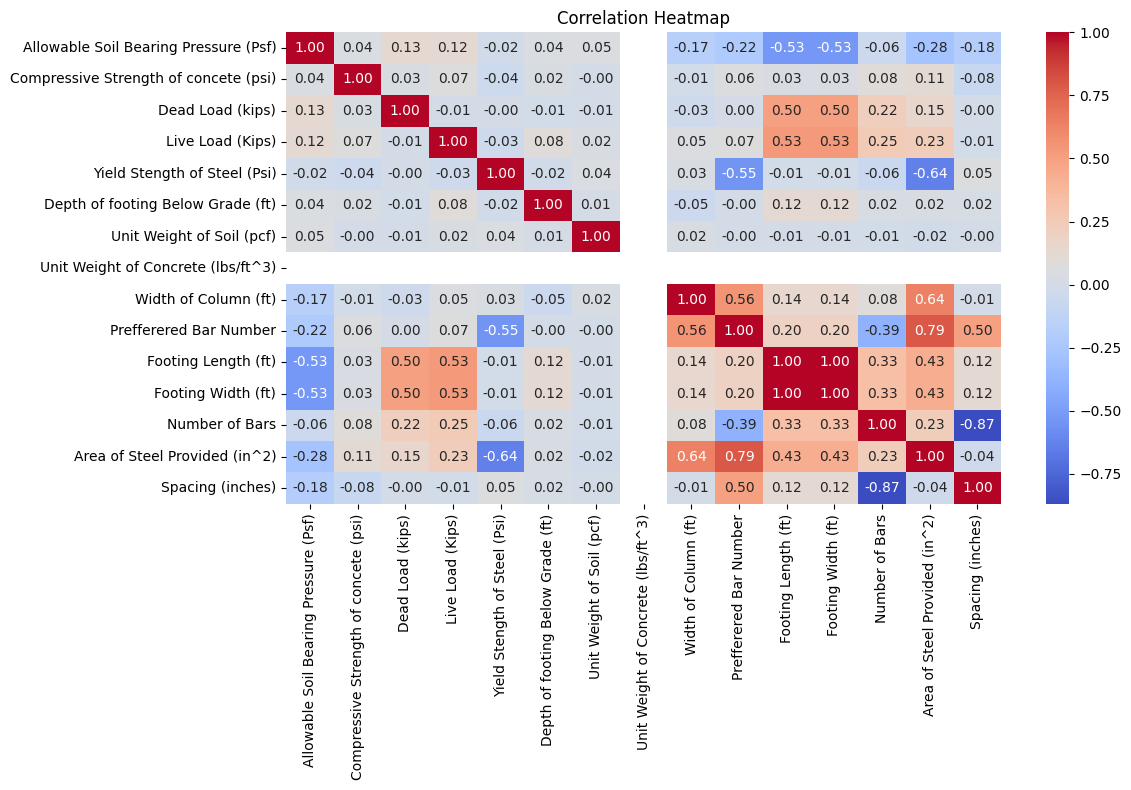

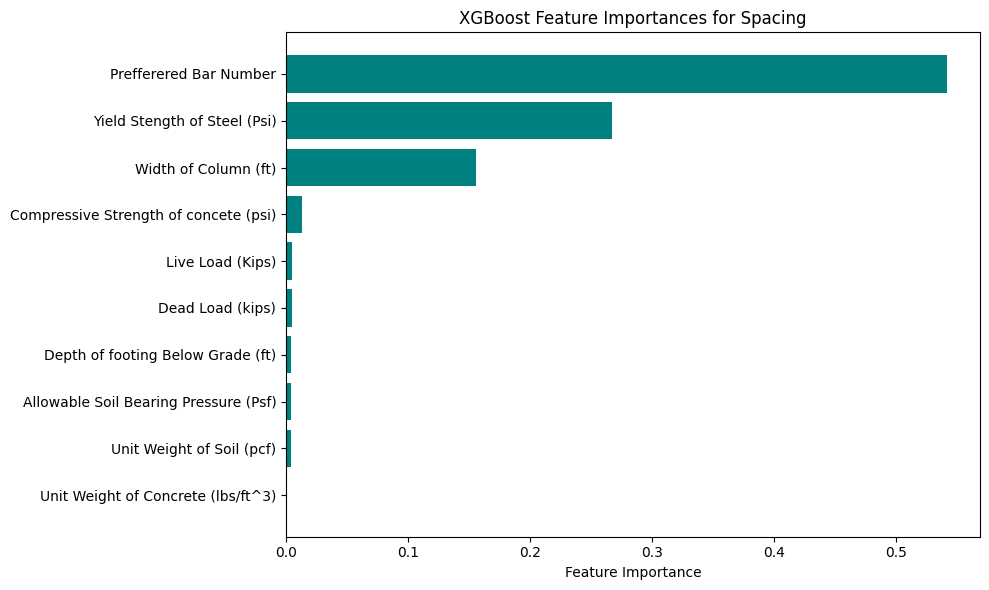

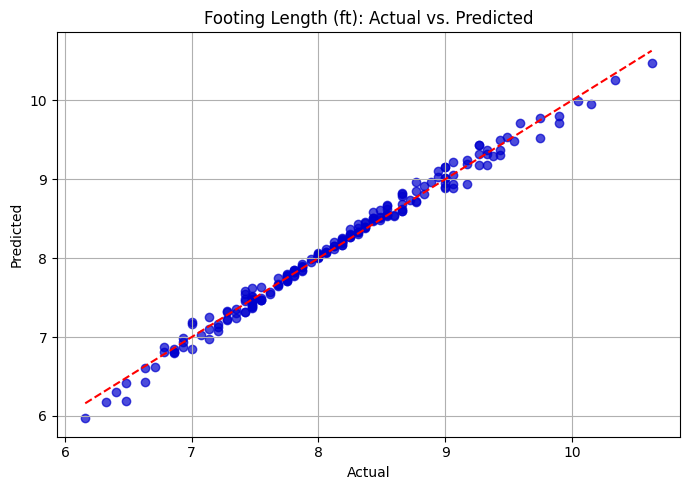

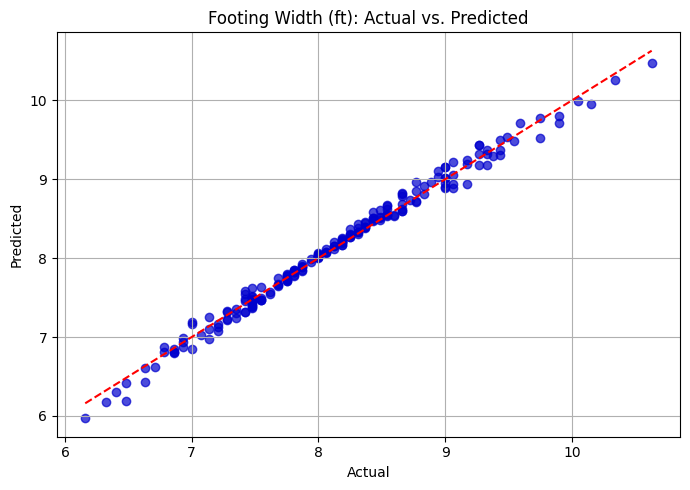

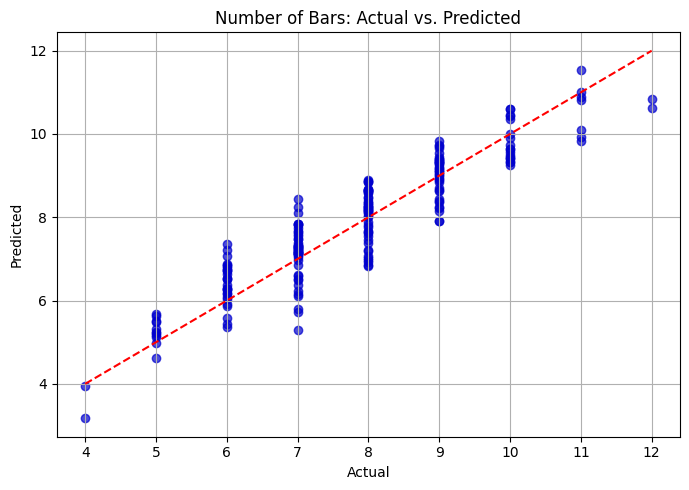

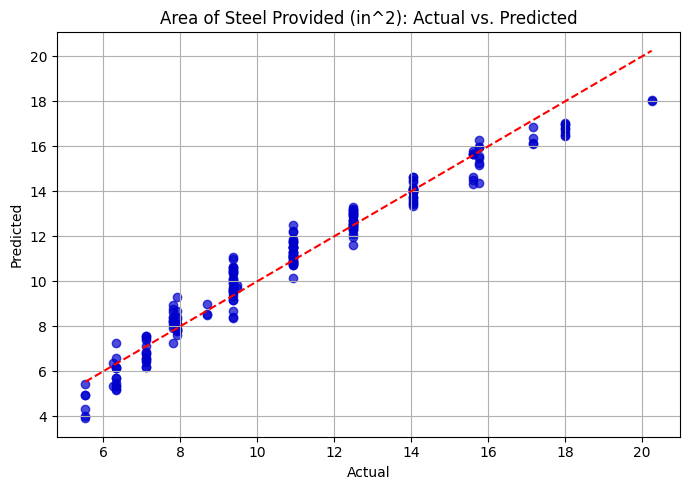

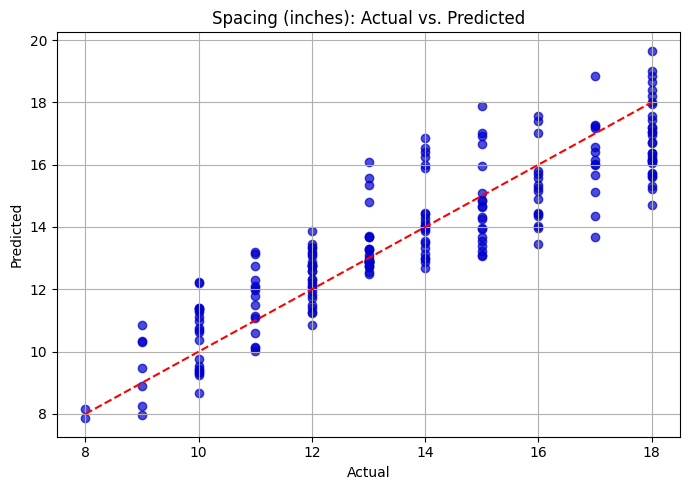

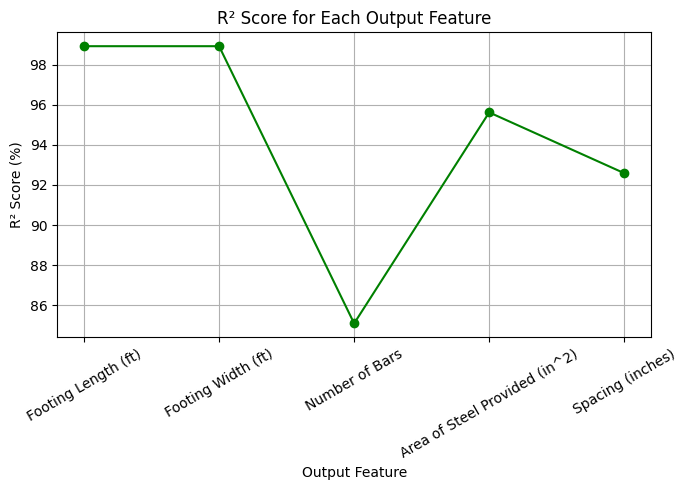

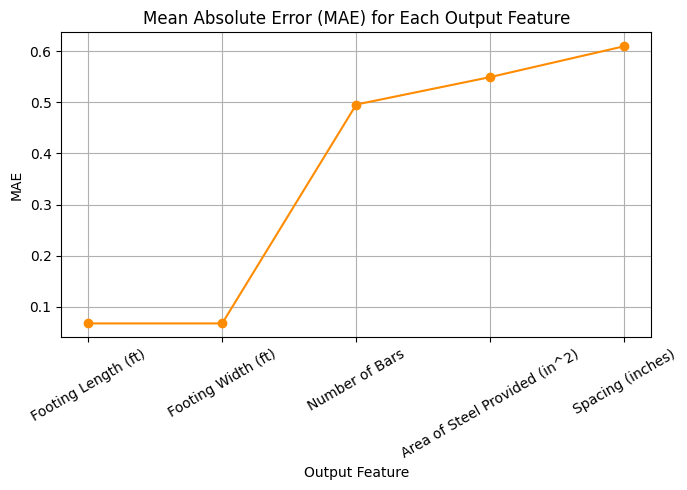

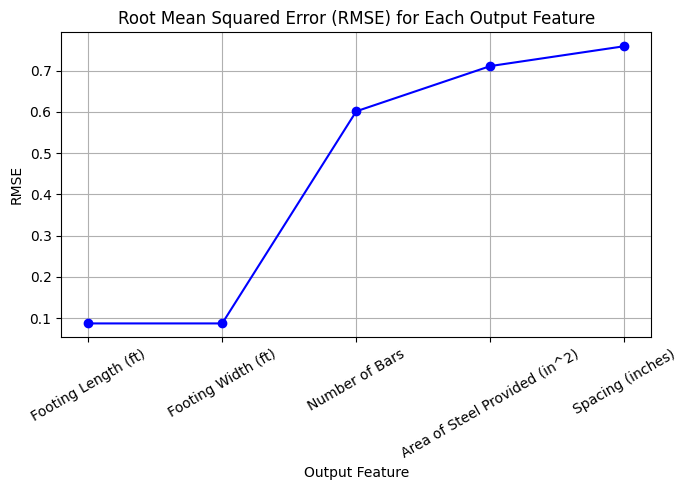


--- Enter Input Values for Prediction ---
Allowable Soil Bearing Pressure (Psf): 5000
Compressive Strength of concete (psi): 3000
Dead Load (kips): 200
Live Load (Kips): 120
Yield Stength of Steel (Psi): 60000
Depth of footing Below Grade (ft): 6
Unit Weight of Soil (pcf): 100
Unit Weight of Concrete (lbs/ft^3): 150
Width of Column (ft): 1.33
Prefferered Bar Number: 9

--- Predicted Outputs ---
Footing Length (ft): 8.75
Footing Width (ft): 8.75
Number of Bars: 9
Area of Steel Provided (in²): 7.11
Spacing (inches): 11.50


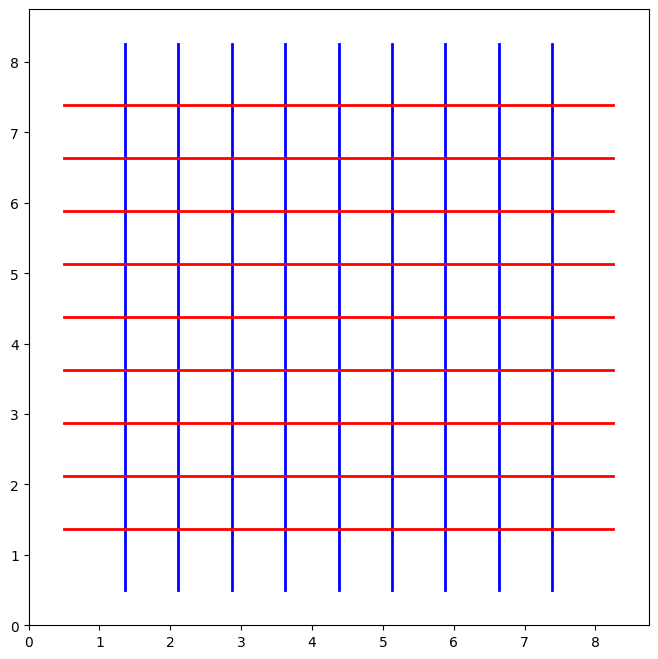

In [ ]:

from google.colab import files
uploaded = files.upload()

# Install necessary libraries
!pip install openpyxl scikit-learn xgboost

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

# Load the data
data = pd.read_excel('Fyp Isolated 1.xlsx')

# Strip column names to avoid hidden whitespaces
data.columns = data.columns.str.strip()

# Define input features (X) and output features (y)
X = data[['Allowable Soil Bearing Pressure (Psf)', 'Compressive Strength of concete (psi)', 'Dead Load (kips)', 'Live Load (Kips)',
    'Yield Stength of Steel (Psi)', 'Depth of footing Below Grade (ft)', 'Unit Weight of Soil (pcf)', 'Unit Weight of Concrete (lbs/ft^3)',
    'Width of Column (ft)', 'Prefferered Bar Number']]

y = data[['Footing Length (ft)', 'Footing Width (ft)', 'Number of Bars',
    'Area of Steel Provided (in^2)', 'Spacing (inches)']]

# Check for any missing values
print(data.isnull().sum())

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate each output separately
for i, col in enumerate(y.columns):
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i]) * 100  # R² as percentage
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print(f"--- {col} ---")
    print(f"R² Score       : {r2:.2f}%")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}\n")

# Initialize and train XGBoost model for spacing
y_spacing = data['Spacing (inches)']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_spacing, test_size=0.2, random_state=42)
scaler_spacing = StandardScaler()
X_train_s_scaled = scaler_spacing.fit_transform(X_train_s)
X_test_s_scaled = scaler_spacing.transform(X_test_s)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_s_scaled, y_train_s)

# Predict on test set
y_pred_spacing = xgb_model.predict(X_test_s_scaled)

# Evaluate XGBoost model for spacing
r2_xgb = r2_score(y_test_s, y_pred_spacing) * 100  # R² as percentage
mae_xgb = mean_absolute_error(y_test_s, y_pred_spacing)
rmse_xgb = np.sqrt(mean_squared_error(y_test_s, y_pred_spacing))
print("--- XGBoost for Spacing (inches) ---")
print(f"R² Score       : {r2_xgb:.2f}%")
print(f"MAE            : {mae_xgb:.2f}")
print(f"RMSE           : {rmse_xgb:.2f}")

# --- 1. Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# --- 2. Feature Importance (XGBoost for Spacing) ---
plt.figure(figsize=(10, 6))
xgb_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(xgb_importances)
plt.barh(range(len(X.columns)), xgb_importances[sorted_idx], color='teal')
plt.yticks(range(len(X.columns)), np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importances for Spacing')
plt.tight_layout()
plt.show()

# --- 3. Actual vs Predicted Plots for All Outputs ---
for i, col in enumerate(y.columns):
    plt.figure(figsize=(7, 5))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.7, color='mediumblue')
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             'r--')  # reference line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{col}: Actual vs. Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#error
# Define output features excluding 'Spacing (inches)'
output_features = ['Footing Length (ft)', 'Footing Width (ft)', 'Number of Bars', 'Area of Steel Provided (in^2)']

# Initialize lists to store the scores
r2_scores = []
maes = []
rmses = []

# Compute R², MAE, and RMSE for each feature using Linear Regression
for i, col in enumerate(output_features):
    r2 = r2_score(y_test[col], y_pred[:, i]) * 100  # R² as percentage
    mae = mean_absolute_error(y_test[col], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred[:, i]))
    r2_scores.append(r2)
    maes.append(mae)
    rmses.append(rmse)

# Compute metrics for 'Spacing (inches)' using XGBoost
r2_spacing_xgb = r2_score(y_test_s, y_pred_spacing) * 100  # R² as percentage
mae_spacing_xgb = mean_absolute_error(y_test_s, y_pred_spacing)
rmse_spacing_xgb = np.sqrt(mean_squared_error(y_test_s, y_pred_spacing))

# Append 'Spacing (inches)' metrics to the lists
output_features.append('Spacing (inches)')
r2_scores.append(r2_spacing_xgb)
maes.append(mae_spacing_xgb)
rmses.append(rmse_spacing_xgb)

# Plot R² scores
plt.figure(figsize=(7, 5))
plt.plot(output_features, r2_scores, marker='o', color='green', label='R² Score')
plt.title('R² Score for Each Output Feature')
plt.ylabel('R² Score (%)')
plt.xlabel('Output Feature')
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(7, 5))
plt.plot(output_features, maes, marker='o', color='darkorange', label='MAE')
plt.title('Mean Absolute Error (MAE) for Each Output Feature')
plt.ylabel('MAE')
plt.xlabel('Output Feature')
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(7, 5))
plt.plot(output_features, rmses, marker='o', color='blue', label='RMSE')
plt.title('Root Mean Squared Error (RMSE) for Each Output Feature')
plt.ylabel('RMSE')
plt.xlabel('Output Feature')
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()





# --- Predict Output Based on User Input ---
input_features = [
    "Allowable Soil Bearing Pressure (Psf)",
    "Compressive Strength of concete (psi)",
    "Dead Load (kips)",
    "Live Load (Kips)",
    "Yield Stength of Steel (Psi)",
    "Depth of footing Below Grade (ft)",
    "Unit Weight of Soil (pcf)",
    "Unit Weight of Concrete (lbs/ft^3)",
    "Width of Column (ft)",
    "Prefferered Bar Number"
]

user_input = []

print("\n--- Enter Input Values for Prediction ---")
for feature in input_features:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Convert to DataFrame
user_input_df = pd.DataFrame([user_input], columns=input_features)

# Scale input using the same scaler
user_input_scaled = scaler.transform(user_input_df)

# Predict all outputs using Linear Regression model (except spacing)
predicted_all = model.predict(user_input_scaled)

# Predict spacing using XGBoost model (separately scaled)
user_input_scaled_spacing = scaler_spacing.transform(user_input_df)
predicted_spacing = xgb_model.predict(user_input_scaled_spacing)[0]  # returns array, take first element

# --- Rounding Rules ---
footing_length = round(predicted_all[0][0] * 4) / 4         # round to nearest 0.25
footing_width = round(predicted_all[0][1] * 4) / 4          # round to nearest 0.25
number_of_bars = int(np.ceil(predicted_all[0][2]))          # round UP to nearest integer
area_of_steel = round(predicted_all[0][3], 2)               # 2 decimal precision
spacing = np.floor(predicted_spacing * 4) / 4               # round DOWN to nearest 0.25
# Divide the total number of bars equally between X and Y directions
bars_in_x = number_of_bars+1 # Total bars in X direction
bars_in_y = number_of_bars+1 # Total bars in Y direction

# Calculate spacing for both directions
spacing_x = (footing_length - 2 * 0.5) / (bars_in_x)  # Spacing in X direction considering cover of 1.5 inch
spacing_y = (footing_width - 2 * 0.5) / (bars_in_y)   # Spacing in Y direction considering cover of 1.5 inch

# Create a figure to visualize the layout
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([0, footing_length])
ax.set_ylim([0, footing_width])

# Plot reinforcement bars in X direction (Vertical bars)
x_positions = np.linspace(0.5 + spacing_x, footing_length - 0.5 - spacing_x, bars_in_x)  # Evenly spaced bars in X direction
for x in x_positions:
    ax.plot([x, x], [0.5, footing_width - 0.5], color='b', lw=2)  # Bars in X direction (vertical lines)

# Plot reinforcement bars in Y direction (Horizontal bars)
y_positions = np.linspace(0.5 + spacing_y, footing_width - 0.5 - spacing_y, bars_in_y)  # Evenly spaced bars in Y direction
for y in y_positions:
    ax.plot([0.5, footing_length - 0.5], [y, y], color='r', lw=2)  # Bars in Y direction (horizontal lines_]()


# --- Display Results ---
print("\n--- Predicted Outputs ---")
print(f"Footing Length (ft): {footing_length:.2f}")
print(f"Footing Width (ft): {footing_width:.2f}")
print(f"Number of Bars: {number_of_bars+1}")
print(f"Area of Steel Provided (in²): {area_of_steel:.2f}")
print(f"Spacing (inches): {spacing:.2f}")




